#  Credit Card Leads Prediction 


***A JOB-A-THON conducted by Analytics Vidhya***

## Problem Statment:

### To find the probabilities of customer interested in getting a credit card, which will help the bank in cross selling amongst different bank account categories using the variables such as Age, Occupation, Avg_Account Balance,etc..

## Import necesary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold, StratifiedKFold

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import warnings
warnings.simplefilter(action='ignore')

### Loading The Train Data And Test Data

In [2]:
data_train=pd.read_csv("../input/jobathon-may-2021-credit-card-lead-prediction/Train_Data.csv")
data_test=pd.read_csv("../input/jobathon-may-2021-credit-card-lead-prediction/Test_Data.csv")

### Analysis The Train And Test Datasets

In [3]:
data_train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
data_test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


### Checking The Rows In Train And Test Data

In [5]:
data_train.shape

(245725, 11)

In [6]:
data_test.shape

(105312, 10)

### Checking The Null Values In Train And Test Data 

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


It can be observed that only 'Credit_Product' coloumn has missing values.

In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


### Checking Duplicated Values In Train And Test Data

In [9]:
data_train[data_train.duplicated(keep= False)]

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead


In [10]:
data_test[data_test.duplicated(keep=False)]

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active


In [11]:
data_train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [12]:
data_test.describe()

,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


### Data Visualizations

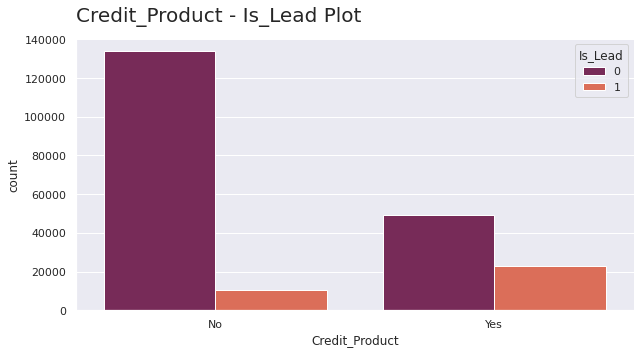

In [13]:
sns.set_style('darkgrid')#set background 

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.countplot(data=data_train, x='Credit_Product', hue='Is_Lead', ax=ax, palette='rocket')
ax.set_title('Credit_Product - Is_Lead Plot', size=20, loc='Left', y=1.04)

sns.despine()#remove axes spines
plt.show()

As only 'Credit_Product'columns has missing values, we shall visualize it first.

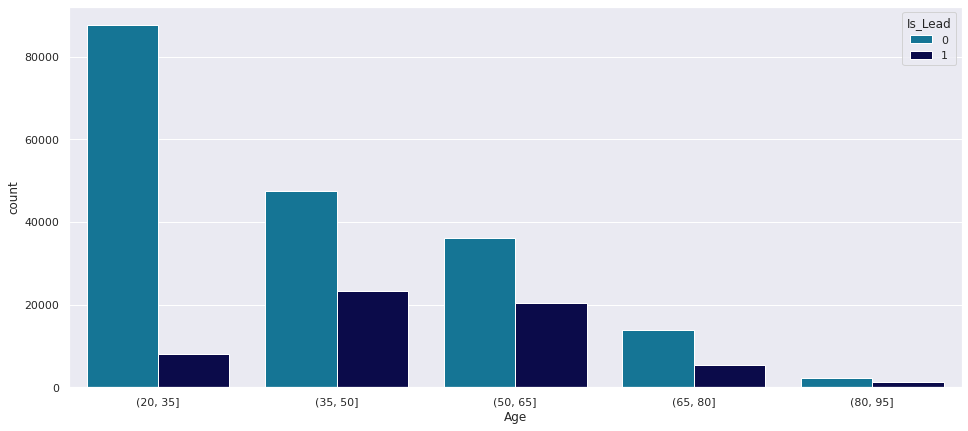

In [14]:
plt.figure(figsize=(16, 7))
temp = data_train.copy()
temp['Age'] = pd.cut(temp.Age, bins=[20, 35, 50, 65, 80, 95])

sns.countplot(data=temp, x='Age', hue='Is_Lead', palette='ocean_r')

plt.show()

It was found that the age could be dividen into age groups

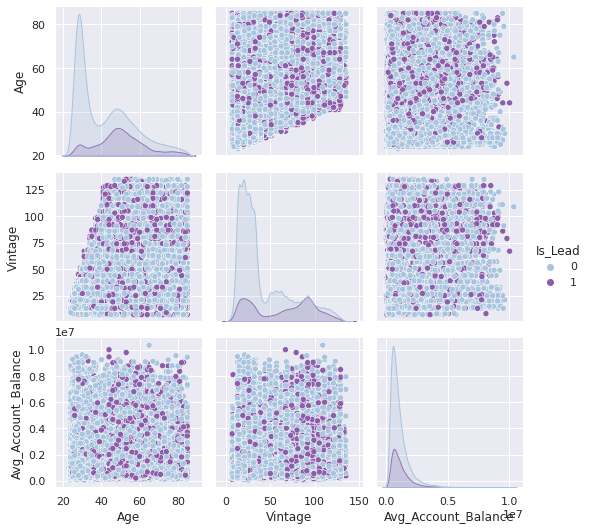

In [15]:
numerical = ['Age','Vintage','Avg_Account_Balance']
sns.pairplot(data=data_train,x_vars=numerical, hue = 'Is_Lead', palette='BuPu')

We shall now plot the numberical variables to look at the distribution

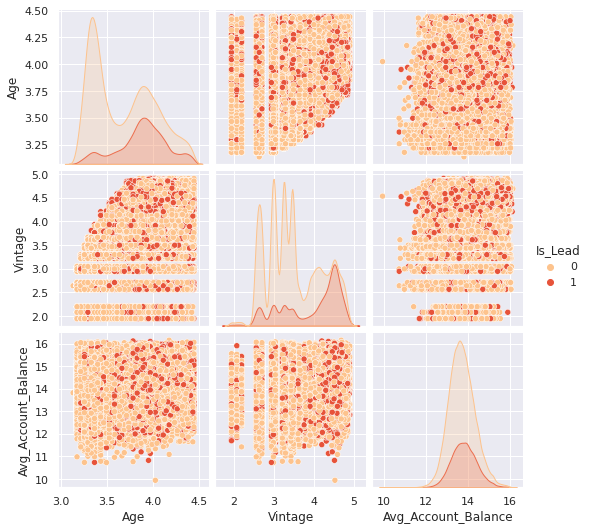

In [16]:
temp1 = data_train.copy()
temp1[numerical] = np.log(data_train[numerical])
sns.pairplot(data=temp1,x_vars=numerical, hue = 'Is_Lead', palette='OrRd')

We shall log trasform the variables and plot again

### Combined The Train and Test Data 

In [17]:
def get_combined_data():
    train = pd.read_csv('../input/jobathon-may-2021-credit-card-lead-prediction/Train_Data.csv')
    test = pd.read_csv('../input/jobathon-may-2021-credit-card-lead-prediction/Test_Data.csv')
    targets = train.Is_Lead
    train.drop('Is_Lead', 1, inplace=True)
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'ID'], inplace=True, axis=1)
    return combined

In [18]:
combined = get_combined_data()
combined.describe()

,Age,Vintage,Avg_Account_Balance
count,351037.000000,351037.000000,3.510370e+05
mean,43.860716,46.924244,1.130141e+06
std,14.841932,32.329303,8.569530e+05
min,23.000000,7.000000,2.079000e+04
25%,30.000000,20.000000,6.041850e+05
50%,43.000000,32.000000,8.951620e+05
75%,54.000000,73.000000,1.368152e+06
max,85.000000,135.000000,1.035201e+07


In [19]:
combined.shape

(351037, 9)

### Filling The Null Values

In [20]:
def impute_Credit_Product():
    global combined
    combined['Credit_Product'].fillna('Yes', inplace=True) 

In [21]:
impute_Credit_Product()

In [22]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351037 entries, 0 to 351036
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               351037 non-null  object
 1   Age                  351037 non-null  int64 
 2   Region_Code          351037 non-null  object
 3   Occupation           351037 non-null  object
 4   Channel_Code         351037 non-null  object
 5   Vintage              351037 non-null  int64 
 6   Credit_Product       351037 non-null  object
 7   Avg_Account_Balance  351037 non-null  int64 
 8   Is_Active            351037 non-null  object
dtypes: int64(3), object(6)
memory usage: 24.1+ MB


### Changing To Labelencoding

In [23]:
def process_gender():
    global combined
    combined['Gender'] = combined['Gender'].map({'Male':1,'Female':0})   

In [24]:
def process_Occupation():
    global combined
    combined['Occupation'] = combined['Occupation'].map({'Other':0,'Salaried':1,'Self_Employed':2,'Entrepreneur':3})

In [25]:
def process_Credit_Product():
    global combined
    combined['Credit_Product'] = combined['Credit_Product'].map({'No':0,'Yes':1})

In [26]:
def process_Is_Active():
    global combined
    combined['Is_Active'] = combined['Is_Active'].map({'No':0,'Yes':1})

In [27]:
process_gender()
process_Occupation()
process_Credit_Product()
process_Is_Active()

In [28]:
combined.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0,73,RG268,0,X3,43,0,1045696,0
1,0,30,RG277,1,X1,32,0,581988,0
2,0,56,RG268,2,X3,26,0,1484315,1
3,1,34,RG270,1,X1,19,0,470454,0
4,0,30,RG282,1,X1,33,0,886787,0


In [29]:
combined.shape

(351037, 9)

In [30]:
label = LabelEncoder()
var_label = ['Region_Code','Channel_Code']
for i in var_label:
    combined[i]=label.fit_transform(combined[i])

### Normalize The Data

<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Density'>

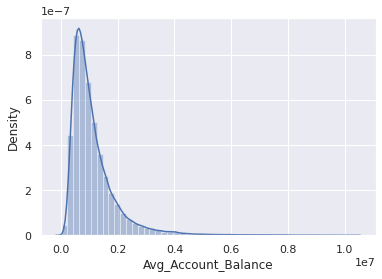

In [31]:
sns.distplot(combined["Avg_Account_Balance"])

In [32]:
combined["Avg_Account_Balance"]=np.log(combined["Avg_Account_Balance"])

<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Density'>

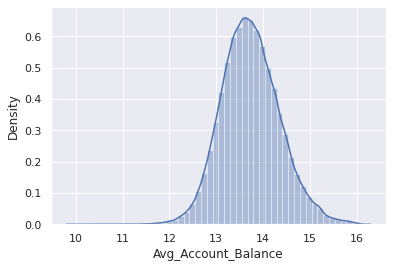

In [33]:
sns.distplot(combined["Avg_Account_Balance"])

### Spiliting The Data

In [34]:
train=combined[:245725]
test=combined[245725:]
targets=data_train.Is_Lead

### User defined function for validating all the models

In [35]:
def cross_val_score(train,targets,model,params, folds=9): 
    
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=21)
    
    for fold, (train_temp,test_temp) in enumerate(skf.split(train,targets)):
        
        x_train,y_train = train.iloc[train_temp], targets.iloc[train_temp]
    
        x_test,y_test = train.iloc[test_temp],targets.iloc[test_temp]
    
    
        models=model(**params)
        models.fit(x_train,y_train,
                  eval_set=[(x_test, y_test)],
                  early_stopping_rounds=100,
                  verbose=400)
    
        pred = models.predict_proba(x_test)[:, 1]
        roc = roc_auc_score(y_test, pred)
        print(f"roc_auc_score: {roc}")
        print("-"*50)
        
    return models

### Cat Boosting

In [36]:
cat_params= {'n_estimators': 20000, 
                  'depth': 4, 
                  'learning_rate': 0.023, 
                  'colsample_bylevel': 0.655, 
                  'bagging_temperature': 0.921, 
                  'l2_leaf_reg': 10.133}

In [37]:
result_cat_boost=cross_val_score(train,targets,CatBoostClassifier,cat_params)

0:	learn: 0.6764678	test: 0.6763910	best: 0.6763910 (0)	total: 103ms	remaining: 34m 25s
400:	learn: 0.3842413	test: 0.3814560	best: 0.3814560 (400)	total: 15.9s	remaining: 12m 55s
800:	learn: 0.3817862	test: 0.3795634	best: 0.3795627 (798)	total: 31.4s	remaining: 12m 33s
1200:	learn: 0.3805439	test: 0.3790439	best: 0.3790396 (1187)	total: 47.6s	remaining: 12m 25s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.3789421188
bestIteration = 1437

Shrink model to first 1438 iterations.
roc_auc_score: 0.8534224360969168
--------------------------------------------------
0:	learn: 0.6764287	test: 0.6764170	best: 0.6764170 (0)	total: 37.3ms	remaining: 12m 25s
400:	learn: 0.3836110	test: 0.3849638	best: 0.3849638 (400)	total: 15.8s	remaining: 12m 54s
800:	learn: 0.3810497	test: 0.3832354	best: 0.3832354 (800)	total: 31.4s	remaining: 12m 32s
1200:	learn: 0.3799365	test: 0.3828972	best: 0.3828972 (1200)	total: 47.8s	remaining: 12m 28s
1600:	learn: 0.3790302	test: 0.3826910	be

### Light Gradiant Boosting

In [38]:
lgb_params= {'learning_rate': 0.045, 
             'n_estimators': 20000, 
             'max_bin': 94,
             'num_leaves': 10, 
             'max_depth': 27, 
             'reg_alpha': 8.457, 
             'reg_lambda': 6.853, 
             'subsample': 0.749}

In [39]:
result_lgb = cross_val_score(train,targets,LGBMClassifier,lgb_params)

Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.378331
Early stopping, best iteration is:
[508]	valid_0's binary_logloss: 0.378207
roc_auc_score: 0.8540707888477899
--------------------------------------------------
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.382506
Early stopping, best iteration is:
[534]	valid_0's binary_logloss: 0.382352
roc_auc_score: 0.8503299839469914
--------------------------------------------------
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.384736
[800]	valid_0's binary_logloss: 0.384589
Early stopping, best iteration is:
[973]	valid_0's binary_logloss: 0.384474
roc_auc_score: 0.8475691187020175
--------------------------------------------------
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.383306
Early stopping, best iteration is:
[607]	valid_0's binary_loglos

### Extreame Gradiant Boosting

In [40]:
xgb_params= {'n_estimators': 20000, 
             'max_depth': 6, 
             'learning_rate': 0.0201, 
             'reg_lambda': 29.326, 
             'subsample': 0.818, 
             'colsample_bytree': 0.235, 
             'colsample_bynode': 0.820, 
             'colsample_bylevel': 0.453}

In [41]:
result_xgb = cross_val_score(train,targets,XGBClassifier,xgb_params)

[06:32:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.68615
[400]	validation_0-logloss:0.39828
[800]	validation_0-logloss:0.38828
[1200]	validation_0-logloss:0.38519
[1600]	validation_0-logloss:0.38389
[2000]	validation_0-logloss:0.38285
[2400]	validation_0-logloss:0.38222
[2800]	validation_0-logloss:0.38180
[3200]	validation_0-logloss:0.38159
[3600]	validation_0-logloss:0.38121
[4000]	validation_0-logloss:0.38101
[4400]	validation_0-logloss:0.38080
[4461]	validation_0-logloss:0.38079
roc_auc_score: 0.8522858966420418
--------------------------------------------------
[06:35:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eva

### Average We Are Taking  of XGB,LGB And CAT

In [42]:
pred_test_lgb = result_lgb.predict_proba(test)[:,1]
pred_test_xgb = result_xgb.predict_proba(test)[:,1]
pred_test_cat = result_cat_boost.predict_proba(test)[:,1]
prediction = (pred_test_lgb + pred_test_cat+pred_test_xgb)/3

### Output File

In [43]:
output = prediction
df_output = pd.DataFrame()
temp = pd.read_csv('../input/jobathon-may-2021-credit-card-lead-prediction/Test_Data.csv')
df_output['ID'] = temp['ID']
df_output['Is_Lead'] = output
df_output.to_csv('output_cxl.csv',index=False)